In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_ecommerce.csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Checking for null values

In [4]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
df = df.dropna()
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


Convert InvoiceDate from object to datetime

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Changing CustomerID from float to object.
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
df.describe()

,InvoiceDate,Quantity,UnitPrice
count,406829,406829.000000,406829.000000
mean,2011-07-10 16:30:57.879207424,50.478471,50.477654
min,2010-12-01 08:26:00,1.000000,1.000000
25%,2011-04-06 15:02:00,25.000000,25.710000
50%,2011-07-31 11:48:00,50.000000,50.430000
75%,2011-10-20 13:06:00,75.000000,75.170000
max,2011-12-09 12:50:00,100.000000,100.000000
std,NaN,28.872921,28.573075


In [8]:
df['TotalSales'] = df['Quantity'] * df ['UnitPrice']
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalSales
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35


In [9]:
df.describe()

,InvoiceDate,Quantity,UnitPrice,TotalSales
count,406829,406829.000000,406829.000000,406829.000000
mean,2011-07-10 16:30:57.879207424,50.478471,50.477654,2550.053514
min,2010-12-01 08:26:00,1.000000,1.000000,1.000000
25%,2011-04-06 15:02:00,25.000000,25.710000,723.840000
50%,2011-07-31 11:48:00,50.000000,50.430000,1914.870000
75%,2011-10-20 13:06:00,75.000000,75.170000,3885.120000
max,2011-12-09 12:50:00,100.000000,100.000000,9999.000000
std,NaN,28.872921,28.573075,2211.425935


In [10]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'TotalSales'],
      dtype='object')

In [11]:
# Checking total unique values in each categorical columns
print(f" Total Unique Customers = {df['CustomerID'].nunique()}")
print(f" Total Unique Products = {df['Description'].nunique()}")
print(f" Total Unique Products Code= {df['StockCode'].nunique()}")
print(f" Total Unique Countries= {df['Country'].nunique()}")

 Total Unique Customers = 4372
 Total Unique Products = 10
 Total Unique Products Code= 9000
 Total Unique Countries= 28


Observation: The dataset has 406829 transactions with valid Customer ID. 4372 Unique customers, 28 Countries, 10 Product categories and 9000 products.

In [12]:
category_feature =['CustomerID', 'StockCode', 'Description', 'Country']

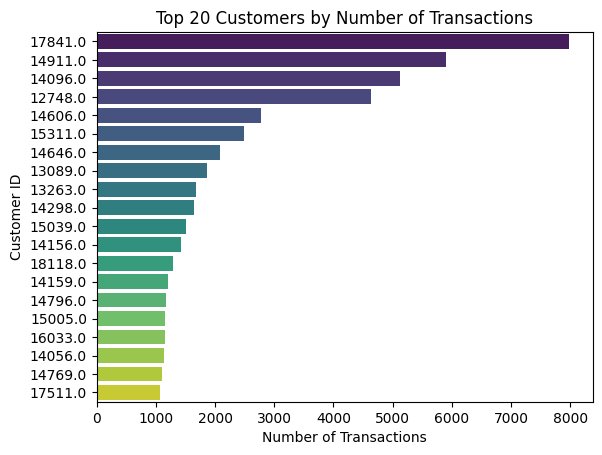

In [13]:
# Top 20 customers by number of transactions
top_customers = df['CustomerID'].value_counts().head(20)
sns.barplot(x=top_customers.values, y=top_customers.index, hue =top_customers.index, palette='viridis')
plt.title("Top 20 Customers by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer ID")
plt.show()

   



In [14]:
countries = df.groupby('Country')['CustomerID'].nunique().reset_index(name='Count')
countries = countries.sort_values(by='Count', ascending=False).reset_index()
countries

,index,Country,Count
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


In [16]:
#Number of Category(Distribution) by Products(Stock code)
Category = df.groupby('Description')['StockCode'].nunique().reset_index(name='Count')
Category= Category.sort_values(by='Count', ascending=False).reset_index()
Category


#df.groupby('Description')['StockCode'].value_counts()

,index,Description,Count
0,5,Jewelry,8925
1,4,Furniture,8921
2,8,Sports Equipment,8918
3,9,Toys,8914
4,2,Cosmetics,8913
5,3,Electronics,8910
6,0,Books,8908
7,6,Kitchenware,8906
8,7,Shoes,8899
9,1,Cloths,8892


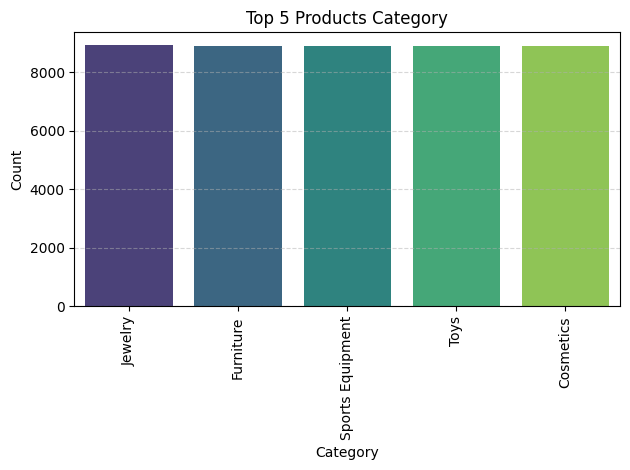

In [17]:
sns.barplot(data = Category.head(5), x='Description', y='Count', hue='Description', palette ='viridis')
plt.title("Top 5 Products Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
Prod = df.groupby('StockCode')['CustomerID'].nunique().reset_index(name='Count')
Prod = Prod.sort_values(by='Count', ascending=False).reset_index()
Prod

,index,StockCode,Count
0,1014,SC2014,74
1,5747,SC6747,69
2,2160,SC3160,68
3,8556,SC9556,68
4,1893,SC2893,67
...,...,...,...
8995,3444,SC4444,23
8996,2730,SC3730,23
8997,5154,SC6154,23
8998,8332,SC9332,20


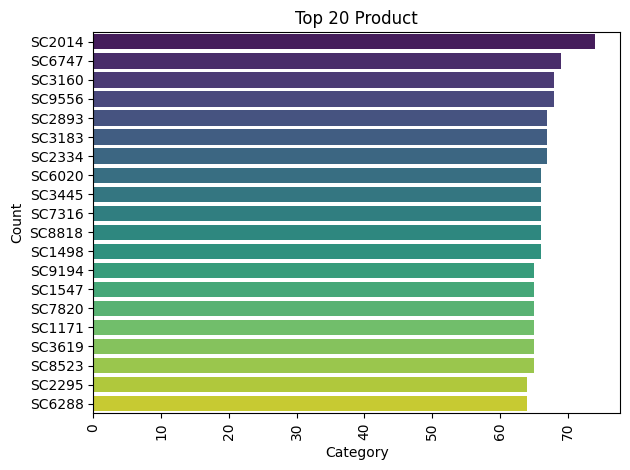

In [ ]:
sns.barplot(data = Prod.head(20), y='StockCode', x='Count', hue='StockCode', palette ='viridis')
plt.title("Top 20 Products")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()